In [35]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.0.1
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.2
h5py                2.10.0
igraph              0.9.4
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidg

In [4]:
alldata = sc.read_h5ad('./write/autism_withoutX.h5ad')

In [5]:
sc.pp.neighbors(alldata, n_neighbors=323, n_pcs=15)
sc.tl.umap(alldata)

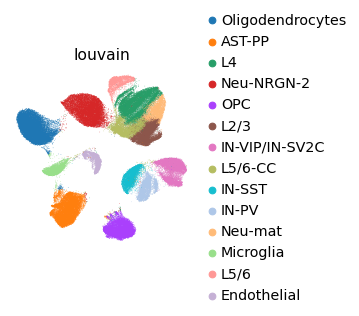

In [6]:
sc.pl.umap(alldata, color='louvain')

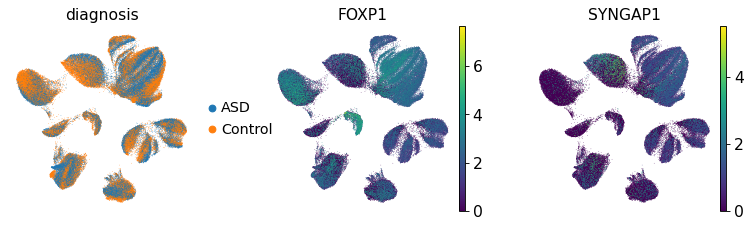

In [7]:
sc.pl.umap(alldata, color=['diagnosis', 'FOXP1', 'SYNGAP1'])

In [8]:
sc.tl.embedding_density(alldata, groupby='diagnosis')

/home/mohyelim7/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/home/mohyelim7/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/home/mohyelim7/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simul

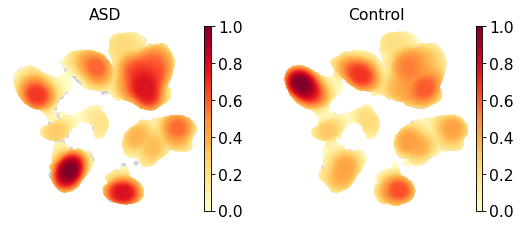

In [9]:
sc.pl.embedding_density(alldata, groupby='diagnosis')

In [10]:
alldata

AnnData object with n_obs × n_vars = 104559 × 36501
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent', 'louvain', 'umap_density_diagnosis'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'diagnosis_colors', 'umap_density_diagnosis_params'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'

In [21]:
is_control = alldata.obs['diagnosis'] == 'Control'
is_asd = alldata.obs['diagnosis'] == 'ASD'

In [22]:
controld = alldata[is_control]
asdd = alldata[is_asd]

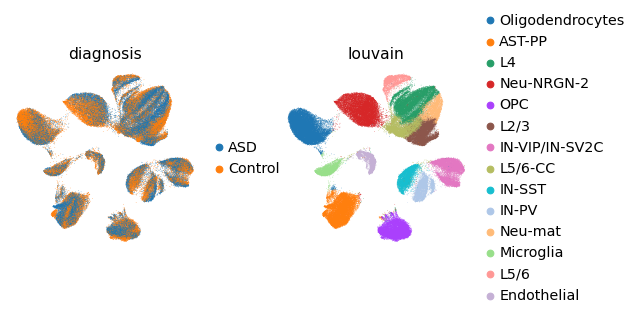

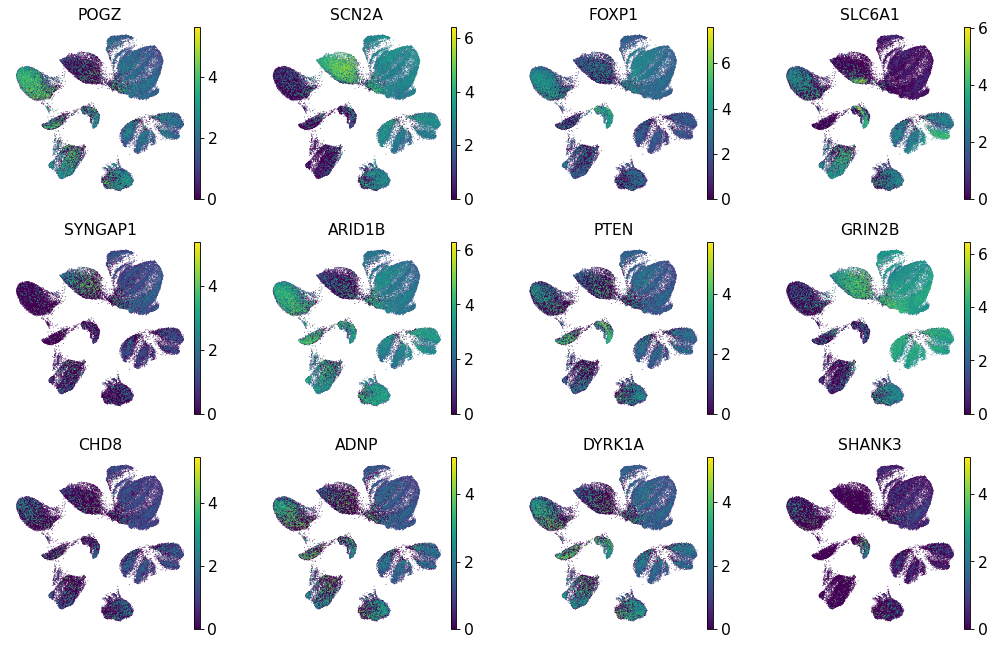

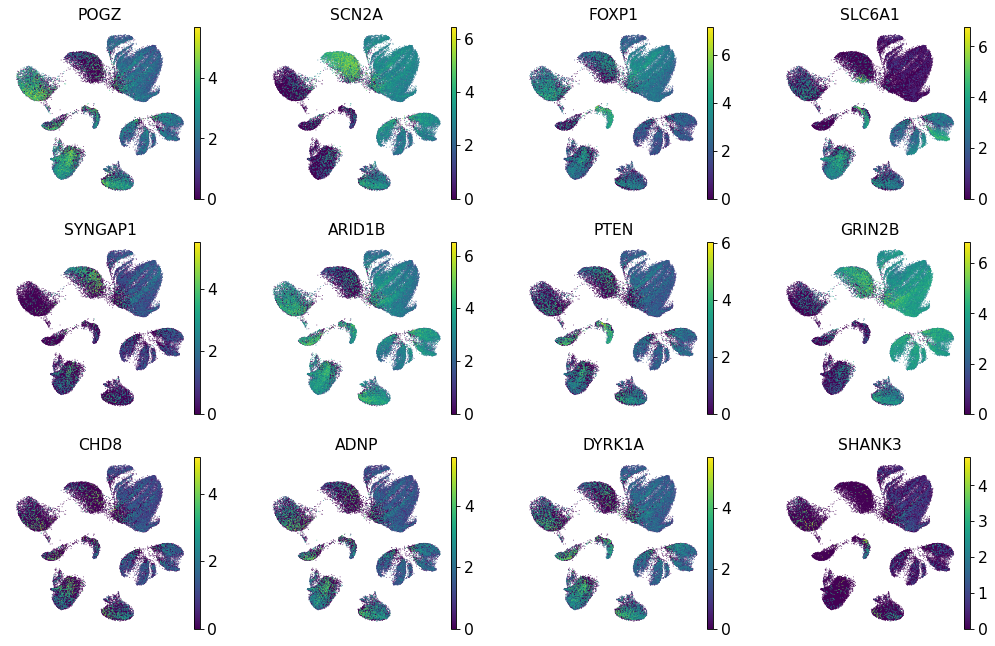

In [27]:
sc.pl.umap(alldata, color=['diagnosis', 'louvain'])

for data in [controld, asdd]:
    sc.pl.umap(data, color=['POGZ', 'SCN2A', 'FOXP1', 'SLC6A1', #'KMT5B'
                            'SYNGAP1', 'ARID1B', 'PTEN', 'GRIN2B',
                            'CHD8', 'ADNP', 'DYRK1A', 'SHANK3'], groups=['diagnosis'])

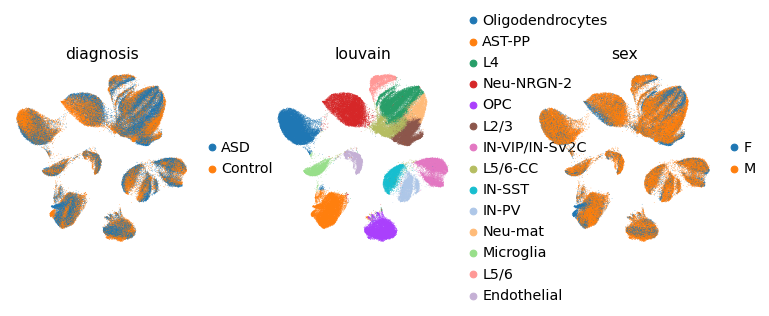

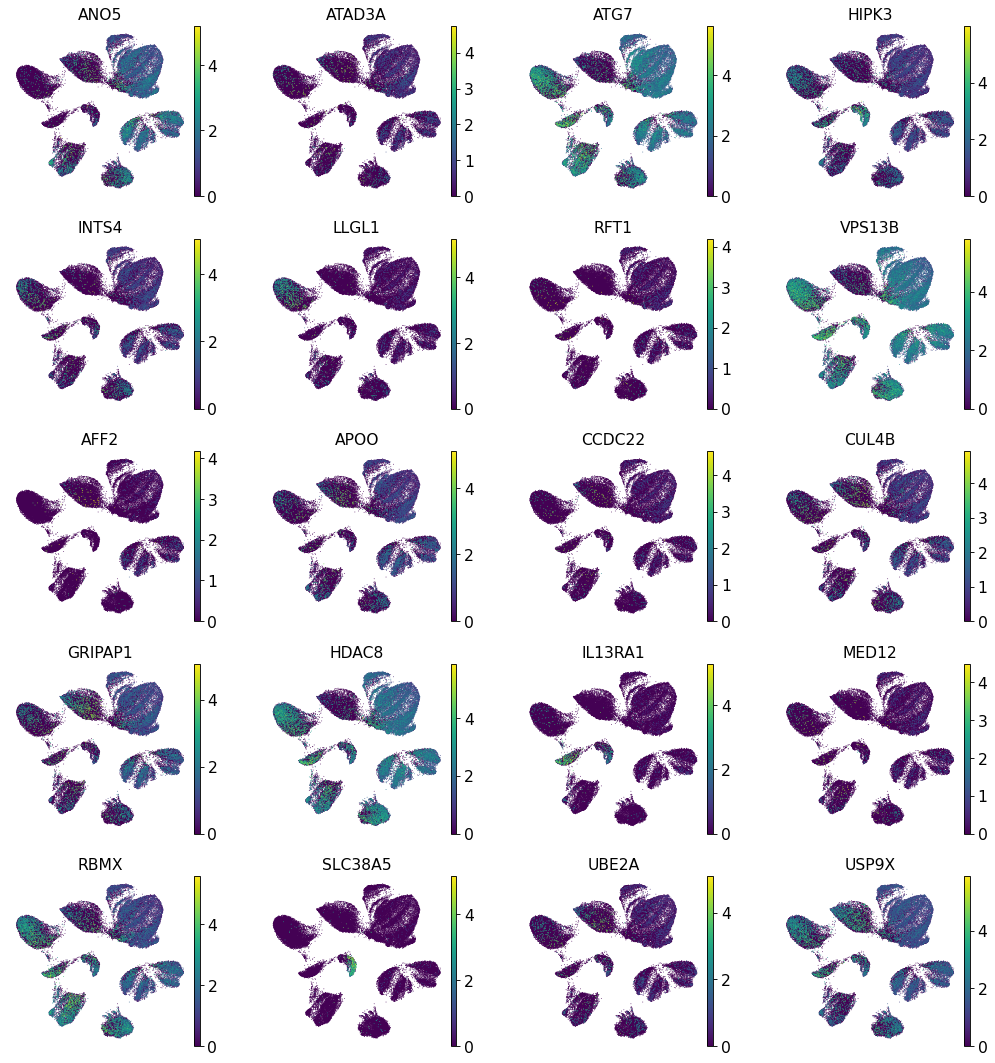

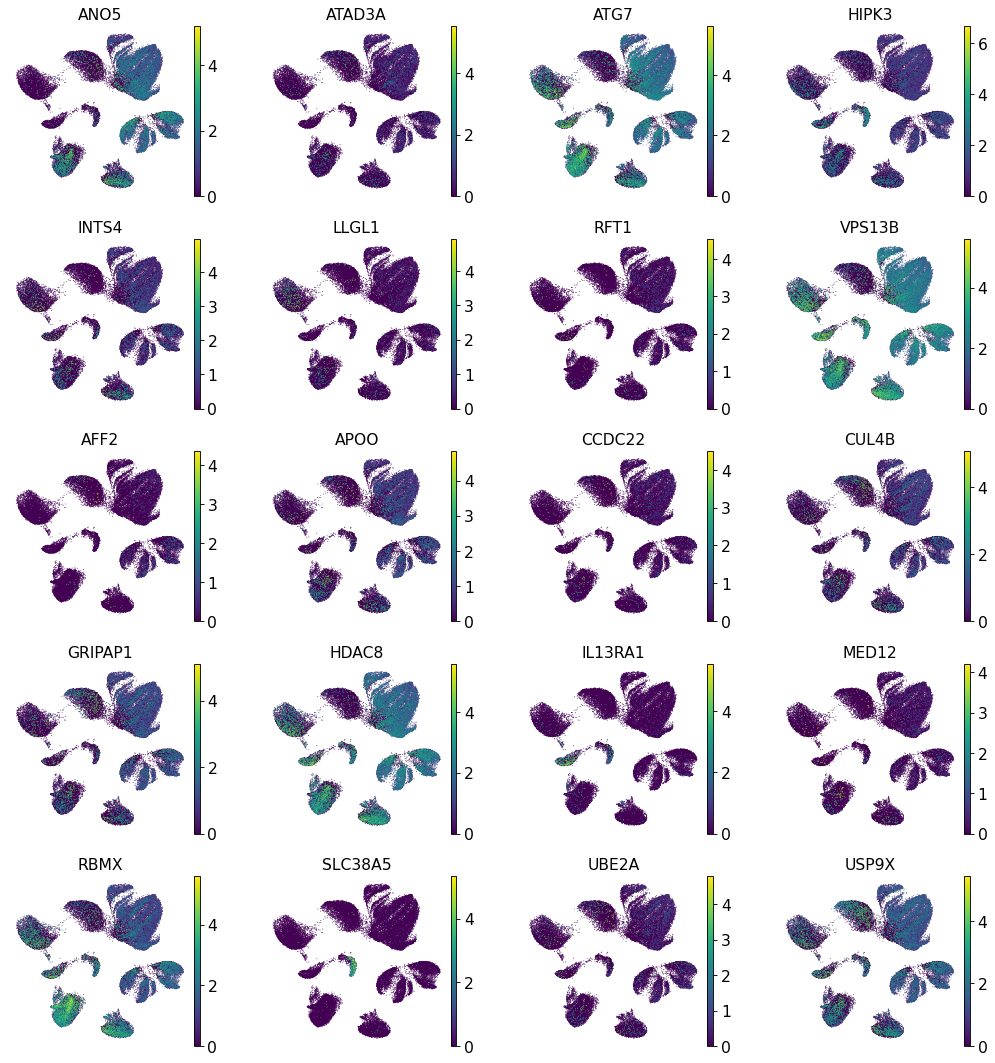

In [30]:
sc.pl.umap(alldata, color=['diagnosis', 'louvain', 'sex'])

for data in [controld, asdd]:
    sc.pl.umap(data, color=['ANO5', 'ATAD3A', 'ATG7', 'HIPK3', 'INTS4',
                            'LLGL1', 'RFT1', 'VPS13B', 'AFF2', 'APOO',
                            'CCDC22', 'CUL4B', 'GRIPAP1', 'HDAC8', 'IL13RA1', 
                            'MED12', 'RBMX', 'SLC38A5', 'UBE2A', 'USP9X'], groups=['diagnosis']) # 'CYBB'

categories: AST-FB, AST-PP, Endothelial, etc.
var_group_labels: ASD, Control


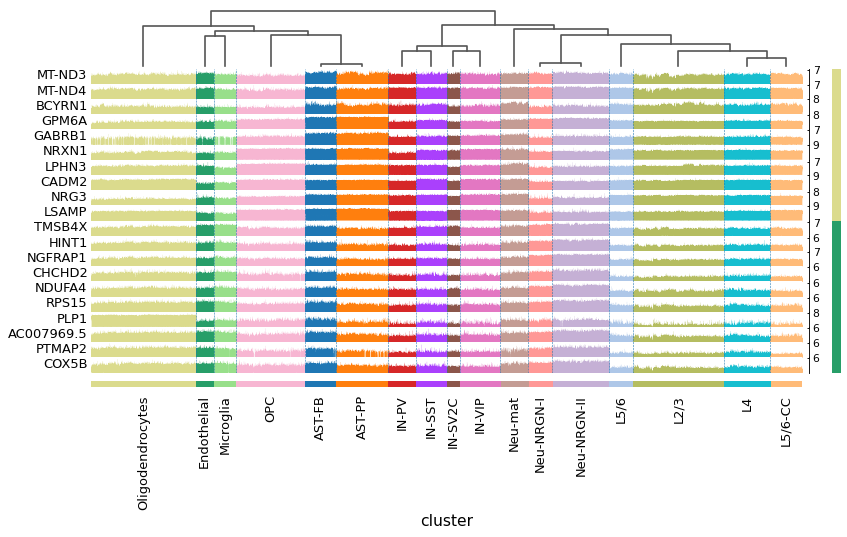

In [50]:
sc.tl.rank_genes_groups(alldata, groupby='diagnosis', use_raw=False, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(alldata, groupby='cluster') # plot the result

In [33]:
alldata.X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.9677483, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 2.1633284, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 3.8806832, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.7960377, 0.       ,
        0.       ]], dtype=float32)

In [51]:
count = np.power(2, alldata.X)

In [52]:
count_int = np.trunc(count)
count_int

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  4.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., 14.,  1.,  1.],
       [ 1.,  1.,  1., ...,  6.,  1.,  1.]], dtype=float32)

In [66]:
alldata.X = count_int

In [49]:
variable1 = adata[ alldata.obs['diagnosis'] == 'control' ]
variable2 = adata[ alldata.obs['diagnosis'] == 'ASD' ]

ttest = ttest_ind(variable1, 
          variable2, 
          equal_var=False, # it's not necessarily fair to assume that these two populations have equal variance
          nan_policy='omit') # omit NaN values
print(ttest)

KeyError: 'diagnosis'

categories: AST-FB, AST-PP, Endothelial, etc.
var_group_labels: ASD, Control


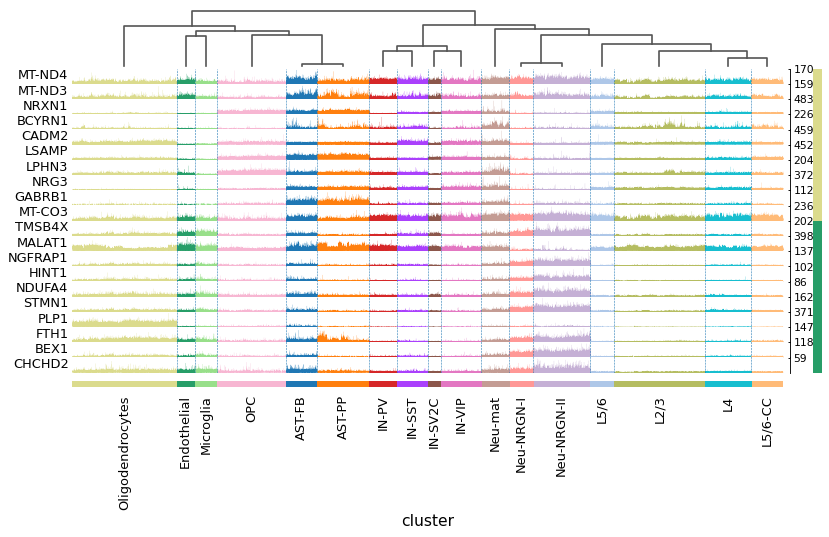

In [76]:
sc.tl.rank_genes_groups(alldata, groupby='diagnosis', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(alldata, groupby='cluster') # plot the result

/home/mohyelim7/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


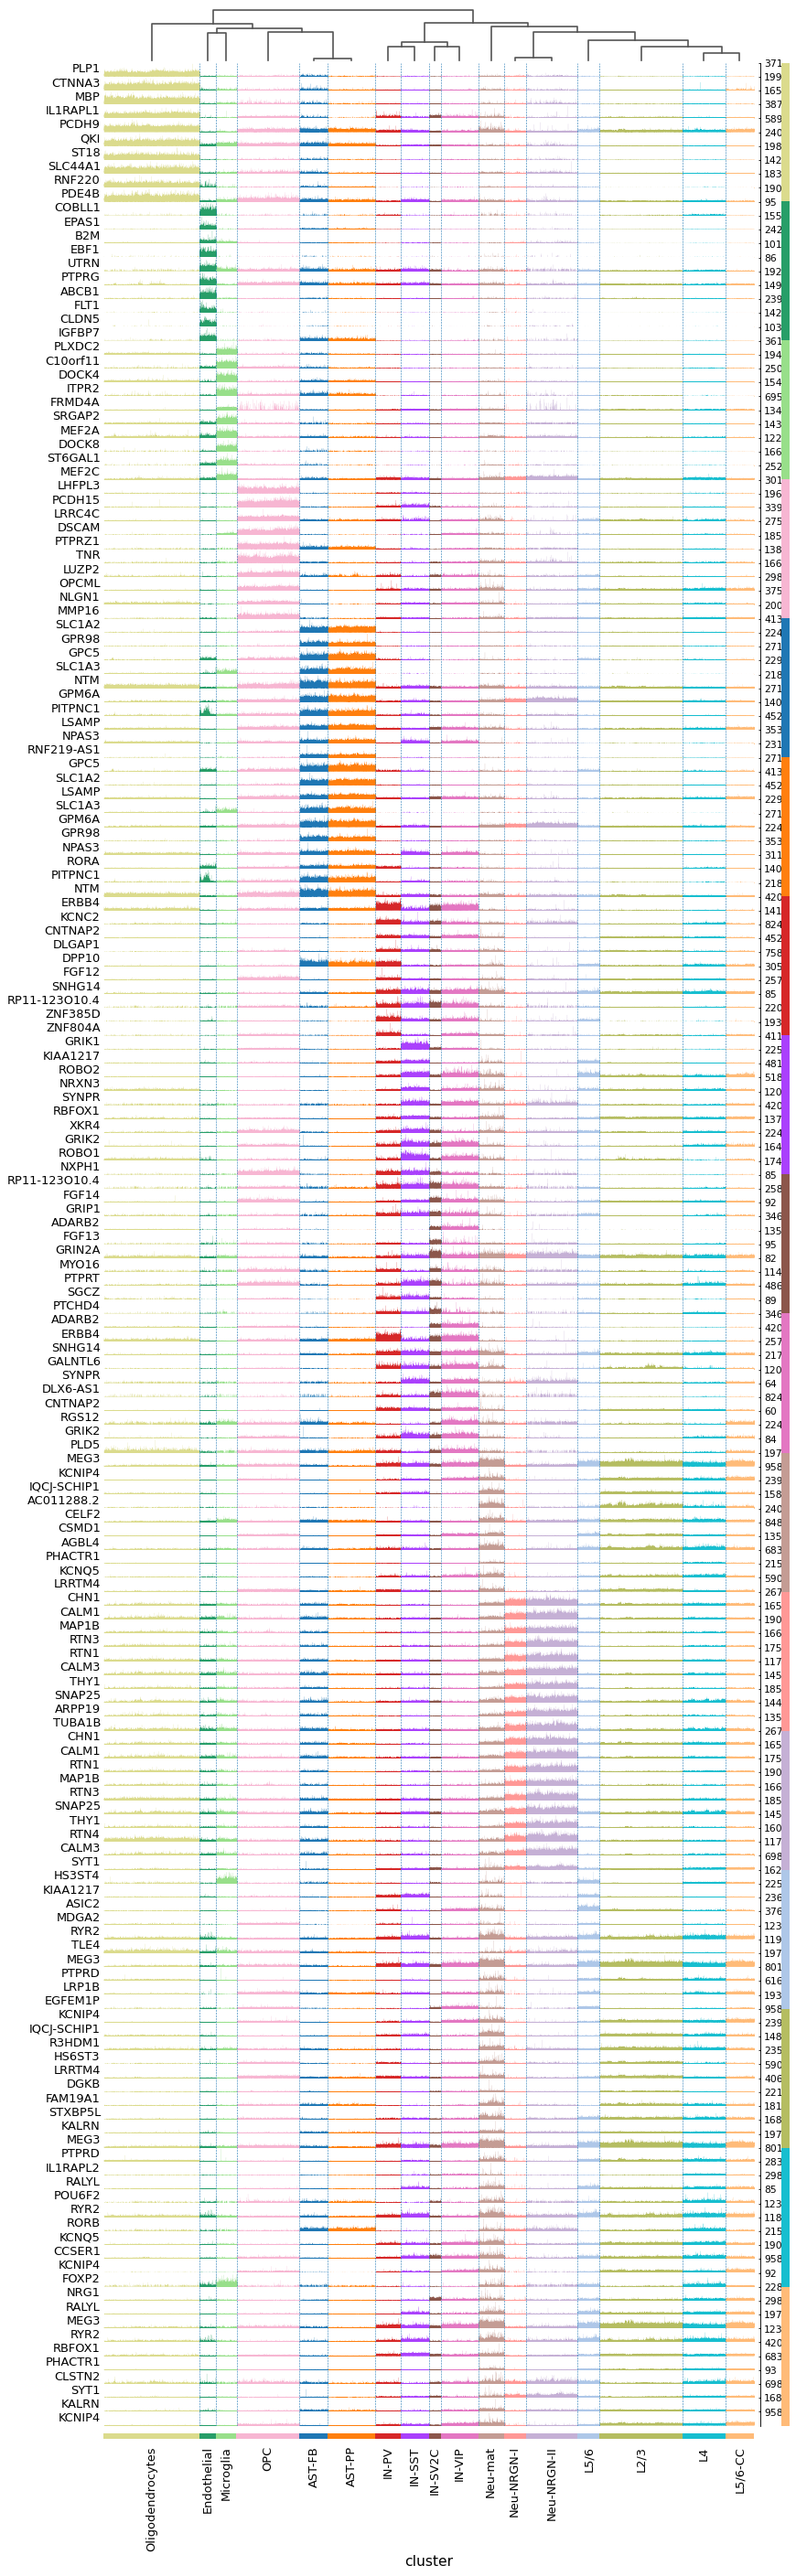

In [73]:
sc.tl.rank_genes_groups(alldata, groupby='cluster', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(alldata, groupby='cluster') # plot the result